# Homework 5, Part 2: Answer questions with pandas

**Use the Excel file to answer the following questions.** This is a little more typical of what your data exploration will look like with pandas.

## 0) Setup

Import pandas **with the correct name** .

In [1]:
import pandas as pd

## 1) Reading in an Excel file

Use pandas to read in the `richpeople.xlsx` Excel file, saving it as a variable with the name we'll always use for a dataframe.

> **TIP:** You will use `read_excel` instead of `read_csv`. Trying `read_excel` the first time will probably not work, you'll get an error message. Be sure to read the error carefully: *you probably need to install a new library before it will work, and the error tells you what the library is named*.

In [2]:
!pip install openpyxl
df = pd.read_excel('richpeople.xlsx')


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [3]:
df.shape

(1653, 30)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     1653 non-null   int64  
 1   name                     1653 non-null   object 
 2   rank                     1653 non-null   int64  
 3   citizenship              1653 non-null   object 
 4   countrycode              1653 non-null   object 
 5   networthusbillion        1653 non-null   float64
 6   selfmade                 1651 non-null   object 
 7   typeofwealth             1651 non-null   object 
 8   gender                   1653 non-null   object 
 9   age                      1590 non-null   float64
 10  industry                 1652 non-null   object 
 11  IndustryAggregates       1652 non-null   object 
 12  region                   1653 non-null   object 
 13  north                    1653 non-null   int64  
 14  politicalconnection     

## 3) Who are the top 10 richest billionaires? Use the `networthusbillion` column.

In [91]:
df.sort_values(by='networthusbillion', ascending=False).name.head(10)

184           Bill Gates
226     Carlos Slim Helu
79        Amancio Ortega
1562      Warren Buffett
862        Larry Ellison
339           David Koch
247         Charles Koch
1364     Sheldon Adelson
280       Christy Walton
724           Jim Walton
Name: name, dtype: object

## 4a) How many male billionaires are there compared to the number of female billionares?

> **TIP:** The last part uses `groupby`, but the count/percent part does not.
> **TIP:** When I say "average," you can pick what kind of average you use.

In [6]:
df.gender.value_counts()

gender
male      1473
female     180
Name: count, dtype: int64

## 4b) What percent is that?

In [7]:
((df.gender.value_counts()/1653)*100).round(2)

gender
male      89.11
female    10.89
Name: count, dtype: float64

## 4c) Is the average wealth different for a female billionaire as compared to a male billionaire?

In [8]:
df.groupby(by='gender').networthusbillion.mean()

gender
female    3.920556
male      3.902716
Name: networthusbillion, dtype: float64

In [9]:
df.groupby(by='gender').networthusbillion.median()

gender
female    2.3
male      2.1
Name: networthusbillion, dtype: float64

## 5a) What is the most common source/type of wealth?

In [12]:
df.typeofwealth.value_counts()

typeofwealth
inherited                   506
founder non-finance         467
self-made finance           344
privatized and resources    192
executive                   142
Name: count, dtype: int64

## 5b) Is the most common source/type of wealth different between men and women?

> **TIP:** You know how to `groupby` and you know how to count how many times a value is in a column. Can you put them together???
>
> **TIP:** Use percentages for this, it makes it a lot more readable.

In [13]:
(df.groupby(by='gender').typeofwealth.value_counts())

gender  typeofwealth            
female  inherited                   142
        founder non-finance          21
        executive                     6
        self-made finance             6
        privatized and resources      5
male    founder non-finance         446
        inherited                   364
        self-made finance           338
        privatized and resources    187
        executive                   136
Name: count, dtype: int64

In [16]:
(((df.groupby(by='gender').typeofwealth.value_counts())/df.gender.value_counts())*100).round(2)

gender  typeofwealth            
female  inherited                   78.89
        founder non-finance         11.67
        executive                    3.33
        self-made finance            3.33
        privatized and resources     2.78
male    founder non-finance         30.28
        inherited                   24.71
        self-made finance           22.95
        privatized and resources    12.70
        executive                    9.23
Name: count, dtype: float64

## 6) What companies have the most billionaires? Graph the top 5 as a horizontal bar graph.

> **TIP:** First find the answer to the question, then just try to throw `.plot()` on the end
>
> **TIP:** You can use `.head()` on *anything*, not just your basic `df`
>
> **TIP:** You might feel like you should use `groupby`, but don't! There's an easier way to count.
>
> **TIP:** Make the largest bar be at the top of the graph
>
> **TIP:** If your chart seems... weird, think about where in the process you're sorting vs using `head`

<Axes: ylabel='sourceofwealth'>

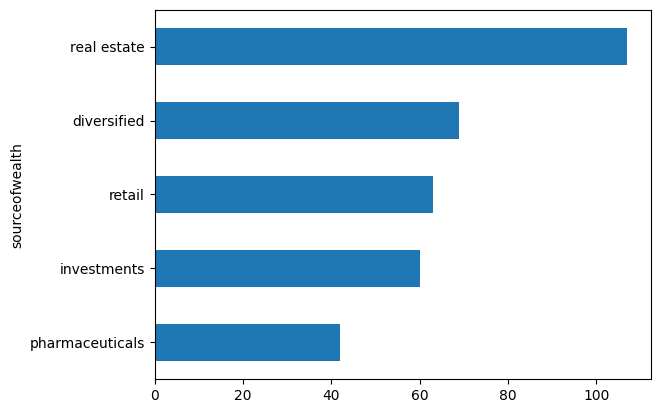

In [28]:
df.sourceofwealth.value_counts().head().sort_values().plot.barh()

## 7) How much money do these top 5 billionaires have in total?

In [29]:
df.sourceofwealth.value_counts().head().sum()

341

## 8) What are the top 10 countries with the most money held by billionaires?

I am **not** asking which country has the most billionaires - this is **total amount of money per country.**

> **TIP:** Think about it in steps - "I want them organized by country," "I want their net worth," "I want to add it all up," and "I want 10 of them." Just chain it all together.

In [49]:
##this sums everything, not the correct answer: 
#df.groupby(by='countrycode').sum('networthusbillion').sort_values(by='networthusbillion', ascending=False).head(10) 

df.groupby(by='countrycode').networthusbillion.sum().sort_values(ascending=False).head(10)

countrycode
USA    2322.4
RUS     422.5
DEU     401.4
CHN     375.8
FRA     235.3
HKG     213.7
BRA     192.2
IND     191.9
ITA     158.1
GBR     152.0
Name: networthusbillion, dtype: float64

## 9a) How old is an average billionaire?

In [42]:
df.age.mean().astype(int)

63

## 9b) How old are self-made billionaires compared to non self-made billionaires? 

In [69]:
df.groupby('selfmade').age.mean().round()

selfmade
inherited    65.0
self-made    63.0
Name: age, dtype: float64

## 10a) Who are the three youngest billionaires? Who are the three oldest?

In [83]:
df.sort_values(by='age', ascending=False).name.head(3) 

343    David Rockefeller, Sr.
816             Karl Wlaschek
836            Kirk Kerkorian
Name: name, dtype: object

In [85]:
df.sort_values(by='age').name.head(3)

1172         Perenna Kei
397     Dustin Moskovitz
1004     Mark Zuckerberg
Name: name, dtype: object

## 10b) Make a graph of the distribution of ages.

> **TIP:** You use `.plot()` to graph values in a column independently, but `.hist()` to draw a [histogram](https://www.mathsisfun.com/data/histograms.html) of the distribution of their values

<Axes: ylabel='Frequency'>

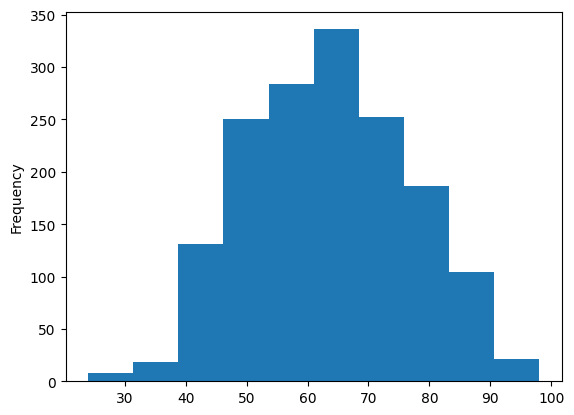

In [86]:
df.age.plot.hist()

## 11) Make a scatterplot of net worth compared to age

It's more fun to do this in Altair as compared to matplotlib, but either is fine.

<Axes: xlabel='age', ylabel='networthusbillion'>

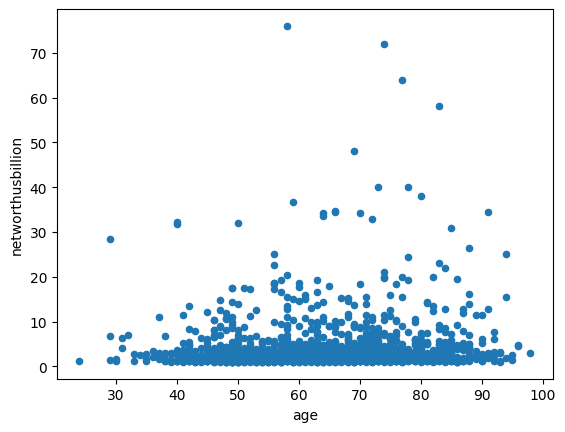

In [90]:
df.plot(x='age', y='networthusbillion', kind='scatter')

## 13) Make a bar graph of the wealth of the top 10 richest billionaires

> **TIP:** When you make your plot, you'll need to set the `x` and `y` or else your chart will look _crazy_
>
> **TIP:** x and y might be the opposite of what you expect them to be

<Axes: ylabel='name'>

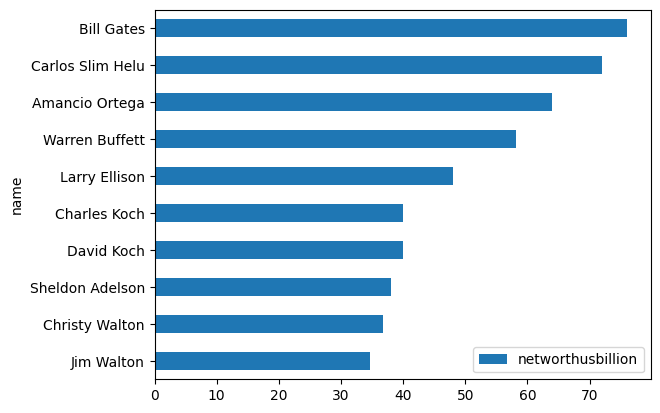

In [96]:
df.sort_values(by='networthusbillion', ascending=False).head(10).sort_values('networthusbillion').plot.barh(x='name', y='networthusbillion')